### Analysis with Pandas of weight loss group results 

In [1]:
import pandas as pd
import numpy as np
# to show plots in jupiter
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#data = pd.read_csv('Persons_All') #latest date is  May 2020
data = pd.read_csv('Persons_All_tillSept2020.csv') # latest date is September 2020

**num - number of person in source database  
name - hash of name  
gender - 0: female; 1: male  
Iba - if a person is an employee for iba.by  
age, height  
month, year - start of activity  
long - how many months activity lasts  
weight, waist... - sizes before  
weightF, waistF... - sizes after**

In [3]:
data.head()

,num,name,gender,Iba,age,height,month,year,long,weight,...,weightF,breastF,ubreastF,waistF,bellyF,hipsF,rLegF,lLegF,rHandF,lHandF
0,1.0,649831865,0.0,1.0,44.0,160.0,9.0,2019.0,1.0,67.50,...,65.70,101.0,86.0,85.0,99.0,101.0,58.0,58.0,31.0,31.0
1,1.0,649831865,0.0,1.0,44.0,160.0,11.0,2019.0,1.0,66.00,...,61.90,98.0,84.0,80.0,95.0,97.0,55.0,55.0,29.0,29.0
2,1.0,649831865,0.0,1.0,44.0,160.0,2.0,2020.0,1.0,62.85,...,61.15,95.0,80.0,79.0,93.0,97.0,54.5,54.5,29.0,30.0
3,1.0,649831865,0.0,1.0,44.0,160.0,3.0,2020.0,1.0,61.15,...,59.15,93.0,79.0,77.0,92.0,96.0,54.0,54.0,28.0,28.0
4,2.0,528993913,0.0,1.0,37.0,172.0,2.0,2020.0,1.0,88.60,...,81.30,102.0,88.0,86.0,100.0,107.0,63.0,62.0,34.0,33.0


**create timestampts for start of activity**

In [4]:
data=data.fillna(0)
data['month']=data['month'].astype(int)
data['year']=data['year'].astype(int)

In [5]:
data['start'] = pd.to_datetime([f'{y}-{m}-{d}' for y, m, d in zip(data.year, data.month, np.ones(len(data['year']), dtype=int))])

**remove unnecessary columns**

In [6]:
data=data.drop('num',axis=1)
data=data.drop('Iba',axis=1)
data=data.drop('month',axis=1)
data=data.drop('year',axis=1)
data=data.drop('breast',axis=1)
data=data.drop('ubreast',axis=1)
data=data.drop('belly',axis=1)
data=data.drop('hips',axis=1)
data=data.drop('rLeg',axis=1)
data=data.drop('lLeg',axis=1)
data=data.drop('rHand',axis=1)
data=data.drop('lHand',axis=1)
data=data.drop('breastF',axis=1)
data=data.drop('ubreastF',axis=1)
data=data.drop('bellyF',axis=1)
data=data.drop('hipsF',axis=1)
data=data.drop('rLegF',axis=1)
data=data.drop('lLegF',axis=1)
data=data.drop('rHandF',axis=1)
data=data.drop('lHandF',axis=1)

**remove records about uncompleted activity**

In [7]:
data=data[data['long']>=1]
data=data.drop('long',axis=1)

**it is a start point**

In [8]:
data.head()

,name,gender,age,height,weight,waist,weightF,waistF,start
0,649831865,0.0,44.0,160.0,67.50,83.0,65.70,85.0,2019-09-01
1,649831865,0.0,44.0,160.0,66.00,88.0,61.90,80.0,2019-11-01
2,649831865,0.0,44.0,160.0,62.85,83.0,61.15,79.0,2020-02-01
3,649831865,0.0,44.0,160.0,61.15,79.0,59.15,77.0,2020-03-01
4,528993913,0.0,37.0,172.0,88.60,92.0,81.30,86.0,2020-02-01


**combine sizes before the first activity with sizes after the last one  
age and height might change**

In [9]:
Total=data.groupby('name').head(1)
Total.set_index('name',inplace=True)
TotalY=data.groupby('name').tail(1)
TotalY.set_index('name',inplace=True)


In [16]:
Total.loc[:,'weightF']=TotalY['weightF']
Total.loc[:,'waistF']=TotalY['waistF']

In [17]:
Total.loc[:,'delta']=Total['weight']-Total['weightF']

In [19]:
Total.loc[:,'deltaPr']=Total['delta']*100/Total['weight']

In [20]:
Total.describe()

,gender,age,height,weight,waist,weightF,waistF,delta,deltaPr
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,0.025478,20.191083,92.808917,78.710510,46.538217,71.596178,42.940764,7.114331,8.915564
std,0.158075,17.349032,82.575850,15.036655,45.629905,13.643792,42.078760,3.883875,4.181264
min,0.000000,0.000000,0.000000,48.000000,0.000000,45.000000,0.000000,-0.500000,-0.778816
25%,0.000000,0.000000,0.000000,68.000000,0.000000,62.200000,0.000000,4.500000,6.508876
50%,0.000000,27.000000,158.000000,75.700000,70.000000,69.600000,66.000000,6.100000,7.941176
75%,0.000000,34.000000,165.000000,87.000000,88.000000,79.500000,81.000000,8.200000,10.461538
max,1.000000,63.000000,182.000000,131.850000,118.000000,121.400000,110.000000,24.600000,27.765237


**let's investigate negative delta**

In [22]:
Total[Total['delta']<0]

,gender,age,height,weight,waist,weightF,waistF,start,delta,deltaPr
name,,,,,,,,,,
1264308416,0.0,50.0,158.0,64.2,86.0,64.7,81.0,2019-06-01,-0.5,-0.778816


In [23]:
data[data['name']==1264308416]

,name,gender,age,height,weight,waist,weightF,waistF,start
40,1264308416,0.0,50.0,158.0,64.2,86.0,59.7,81.0,2019-06-01
165,1264308416,0.0,50.0,158.0,66.5,87.0,64.7,81.0,2020-05-01


**the waist remains the same, so it is a possible this woman built a lot of muscle during a year between participation in work of weight loss group. Have to drop this line out as a data outlier.**

In [37]:
data=Total[Total['delta']>=0]

**let's draw plots**

Text(0.5, 1.0, 'For the whole time of participating')

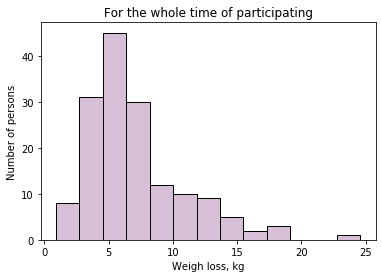

In [39]:
 _, ax = plt.subplots()
ax.hist(data['delta'],bins=13, color='thistle',edgecolor='black')
ax.set_xlabel('Weigh loss, kg')
ax.set_ylabel('Number of persons')
ax.set_title('For the whole time of participating')



In [40]:
data['delta'].describe()

count    156.000000
mean       7.163141
std        3.847773
min        0.900000
25%        4.575000
50%        6.100000
75%        8.225000
max       24.600000
Name: delta, dtype: float64

In [41]:
np.median(data['delta'])

6.099999999999994

Text(0.5, 1.0, 'For the whole time of participating')

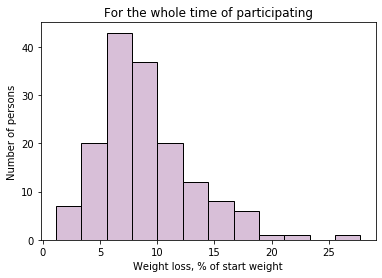

In [42]:
 _, ax = plt.subplots()
ax.hist(data['deltaPr'],bins=12, color='thistle',edgecolor='black')
ax.set_xlabel('Weight loss, % of start weight')
ax.set_ylabel('Number of persons')
ax.set_title('For the whole time of participating')

In [43]:
data['deltaPr'].describe()

count    156.000000
mean       8.977707
std        4.121352
min        1.150895
25%        6.518523
50%        7.953639
75%       10.485043
max       27.765237
Name: deltaPr, dtype: float64

In [45]:
np.median(data['deltaPr'])

7.953639082751746

**let's enjoy the best results**

In [47]:
data[data['delta']>15]

,gender,age,height,weight,waist,weightF,waistF,start,delta,deltaPr
name,,,,,,,,,,
528993913,0.0,37.0,172.0,88.6,92.0,64.0,73.0,2020-02-01,24.6,27.765237
1631792191,0.0,38.0,174.0,111.3,106.0,92.4,94.0,2018-07-01,18.9,16.981132
565306084,1.0,25.0,0.0,101.4,111.0,83.0,97.0,2019-02-01,18.4,18.145957
1545125454,0.0,27.0,166.0,73.3,83.5,56.3,68.0,2017-12-01,17.0,23.192360
1440679962,0.0,0.0,0.0,90.0,0.0,74.2,0.0,2018-03-01,15.8,17.555556
-1705734183,0.0,0.0,0.0,91.0,0.0,72.5,0.0,2019-01-01,18.5,20.329670


In [48]:
data[data['deltaPr']>20]

,gender,age,height,weight,waist,weightF,waistF,start,delta,deltaPr
name,,,,,,,,,,
528993913,0.0,37.0,172.0,88.6,92.0,64.0,73.0,2020-02-01,24.6,27.765237
1545125454,0.0,27.0,166.0,73.3,83.5,56.3,68.0,2017-12-01,17.0,23.192360
-1705734183,0.0,0.0,0.0,91.0,0.0,72.5,0.0,2019-01-01,18.5,20.329670


**What age are people interested in loosing weight at?**

In [51]:
dataAge=data[data['age']>0]
dataAge.describe()

,gender,age,height,weight,waist,weightF,waistF,delta,deltaPr
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,0.042105,32.842105,151.715789,79.523684,74.984211,72.558947,69.165263,6.964737,8.622355
std,0.201895,7.984447,46.631572,16.670065,34.806796,15.222796,32.054740,4.104051,4.362942
min,0.000000,16.000000,0.000000,48.000000,0.000000,45.000000,0.000000,1.000000,1.492537
25%,0.000000,28.000000,160.000000,67.800000,73.500000,62.250000,67.250000,4.450000,6.272877
50%,0.000000,32.000000,164.000000,76.000000,84.000000,68.800000,77.000000,5.900000,7.679181
75%,0.000000,37.000000,167.500000,88.800000,94.500000,81.650000,88.000000,7.850000,9.556986
max,1.000000,63.000000,182.000000,131.850000,118.000000,121.400000,110.000000,24.600000,27.765237


Text(0.5, 1.0, 'For the whole time of participating')

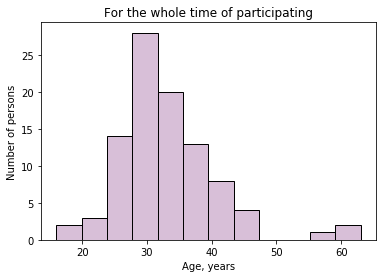

In [52]:
_, ax = plt.subplots()
ax.hist(dataAge['age'],bins=12, color='thistle',edgecolor='black')
ax.set_xlabel('Age, years')
ax.set_ylabel('Number of persons')
ax.set_title('For the whole time of participating')

In [53]:
dataAge.age.describe()

count    95.000000
mean     32.842105
std       7.984447
min      16.000000
25%      28.000000
50%      32.000000
75%      37.000000
max      63.000000
Name: age, dtype: float64

In [56]:
np.median(dataAge.age)

32.0

**I am very impressed by results by the most mature persons**

In [57]:
dataAge[dataAge['age']>60]

,gender,age,height,weight,waist,weightF,waistF,start,delta,deltaPr
name,,,,,,,,,,
508347948,0.0,63.0,0.0,81.0,104.0,67.5,89.0,2019-05-01,13.5,16.666667
-162402000,0.0,62.0,156.0,80.0,0.0,73.1,91.0,2019-01-01,6.9,8.625000


**The youngest ones are successful as well**

In [58]:
dataAge[dataAge['age']<17]

,gender,age,height,weight,waist,weightF,waistF,start,delta,deltaPr
name,,,,,,,,,,
1161034842,0.0,16.0,177.0,72.0,74.0,66.6,67.0,2018-07-01,5.4,7.500000
1598332489,0.0,16.0,171.0,67.6,78.0,61.8,72.0,2020-05-01,5.8,8.579882


https://en.wikipedia.org/wiki/Body_mass_index  
**BMI(Body mass index) is often used to roughly estimate how fat the body is**

In [59]:
dataH=data[data['height']>0]

In [67]:
dataH.loc[:,'BMI']=dataH.loc[:,'weight']/(dataH.loc[:,'height']/100)**2

In [68]:
dataH.loc[:,'BMIF']=dataH.loc[:,'weightF']/(dataH.loc[:,'height']/100)**2

In [69]:
dataH.describe()

,gender,age,height,weight,waist,weightF,waistF,delta,deltaPr,BMI,BMIF
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,0.034483,32.540230,165.666667,79.127011,72.626437,72.340230,67.157471,6.786782,8.451199,28.722483,26.272670
std,0.183523,7.515572,6.221992,16.667040,35.306154,15.271812,32.680417,4.028745,4.335157,5.203904,4.839568
min,0.000000,16.000000,147.000000,48.000000,0.000000,45.000000,0.000000,1.000000,1.492537,18.750000,17.578125
25%,0.000000,28.000000,162.000000,67.550000,71.500000,62.250000,67.000000,4.400000,6.166145,24.716178,22.653895
50%,0.000000,32.000000,165.000000,76.000000,83.000000,69.000000,76.000000,5.700000,7.563025,27.639801,25.529779
75%,0.000000,37.000000,170.000000,88.100000,93.000000,81.100000,86.000000,7.650000,9.453823,31.419970,28.969463
max,1.000000,62.000000,182.000000,131.850000,118.000000,121.400000,110.000000,24.600000,27.765237,42.085608,40.138408


In [71]:
dataH['BMI'].describe()

count    87.000000
mean     28.722483
std       5.203904
min      18.750000
25%      24.716178
50%      27.639801
75%      31.419970
max      42.085608
Name: BMI, dtype: float64

In [72]:
np.median(dataH['BMI'])

27.639801313892

In [73]:
dataH['BMIF'].describe()

count    87.000000
mean     26.272670
std       4.839568
min      17.578125
25%      22.653895
50%      25.529779
75%      28.969463
max      40.138408
Name: BMIF, dtype: float64

In [74]:
np.median(dataH['BMIF'])

25.52977876582165

**let's combine on one plot BMI before (thristle) and after (lightblue)**

Text(0.5, 1.0, 'Body mass index distribution')

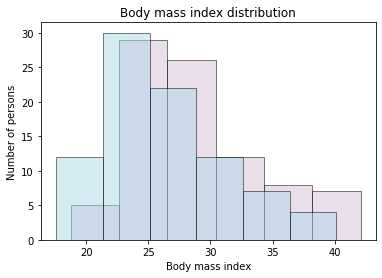

In [90]:
_, ax = plt.subplots()

ax.hist(dataH['BMI'],bins=6, color='thistle',edgecolor='black', alpha=0.5)
ax.hist(dataH['BMIF'],bins=6, color='lightblue',edgecolor='black', alpha=0.5)
ax.set_xlabel('Body mass index')
ax.set_ylabel('Number of persons')
ax.set_title('Body mass index distribution')

**Show relation between number of person with normal BMI and overweight BMI on pie chart**

Text(0.5, 1.0, 'Before')

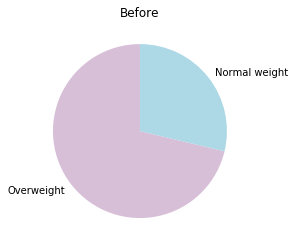

In [95]:
vals = [dataH[dataH['BMI']>25]['BMI'].count(), dataH[dataH['BMI']<=25]['BMI'].count()]
labels = ["Overweight", "Normal weight"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, startangle=90, colors=['thistle','lightblue'])
ax.set_title('Before')


Text(0.5, 1.0, 'After')

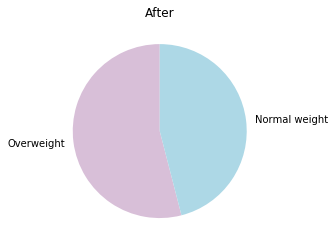

In [96]:
vals = [dataH[dataH['BMIF']>25]['BMIF'].count(), dataH[dataH['BMIF']<=25]['BMIF'].count()]
labels = ["Overweight", "Normal weight"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, startangle=90, colors=['thistle','lightblue'])
ax.set_title('After')

In [97]:
dataW=data[data['waist']>0]
dataW=dataW[dataW['waistF']>0]
dataW.describe()

,gender,age,height,weight,waist,weightF,waistF,delta,deltaPr
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.050633,32.518987,146.721519,79.115823,89.360759,72.470886,82.312658,6.644937,8.266168
std,0.220648,8.658567,53.253852,16.950491,13.168517,15.552312,11.942849,4.141431,4.380932
min,0.000000,0.000000,0.000000,48.000000,64.000000,45.000000,59.000000,1.000000,1.492537
25%,0.000000,28.000000,160.000000,67.150000,78.500000,61.750000,73.500000,4.300000,5.957812
50%,0.000000,32.000000,164.000000,76.000000,88.000000,68.800000,81.000000,5.700000,7.563025
75%,0.000000,37.000000,167.500000,88.800000,96.500000,82.250000,90.000000,7.500000,9.008987
max,1.000000,63.000000,182.000000,131.850000,118.000000,121.400000,110.000000,24.600000,27.765237


In [98]:
dataW['deltaW']=dataW['waist']-dataW['waistF']

Text(0.5, 1.0, 'For the whole time of participating')

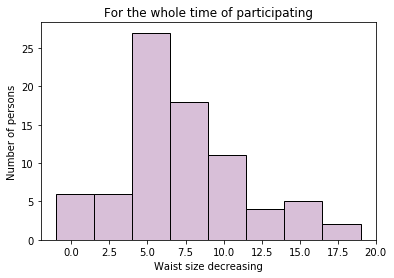

In [99]:
_, ax = plt.subplots()
ax.hist(dataW['deltaW'],bins=8, color='thistle',edgecolor='black')
ax.set_xlabel('Waist size decreasing')
ax.set_ylabel('Number of persons')
ax.set_title('For the whole time of participating')


In [100]:
dataW['deltaW'].describe()

count    79.000000
mean      7.048101
std       4.004896
min      -1.000000
25%       5.000000
50%       6.500000
75%       9.000000
max      19.000000
Name: deltaW, dtype: float64

In [101]:
np.median(dataW['deltaW'])

6.5

In [102]:
dataW['deltaWPr']=dataW['deltaW']/dataW['waist']*100

Text(0.5, 1.0, 'For the whole time of participating')

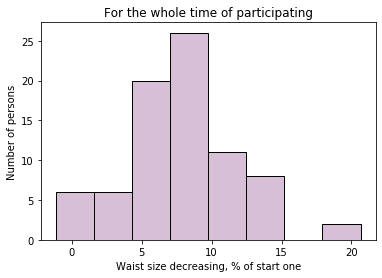

In [103]:
_, ax = plt.subplots()
ax.hist(dataW['deltaWPr'],bins=8, color='thistle',edgecolor='black')
ax.set_xlabel('Waist size decreasing, % of start one')
ax.set_ylabel('Number of persons')
ax.set_title('For the whole time of participating')


In [104]:
dataW['deltaWPr'].describe()

count    79.000000
mean      7.755242
std       4.016339
min      -1.123596
25%       5.730706
50%       7.526882
75%       9.782609
max      20.652174
Name: deltaWPr, dtype: float64

In [105]:
np.median(dataW['deltaWPr'])

7.526881720430108

In [107]:
dataW=dataW[dataW['height']>0]

In [110]:
dataW.loc[:,'WH']=dataW['waist']/dataW['height']

In [112]:
dataW.loc[:,'WHF']=dataW['waistF']/dataW['height']

Text(0.5, 1.0, 'Waist-to-height ratio distribution')

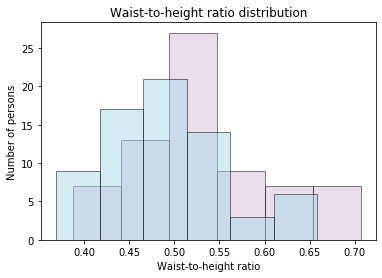

In [113]:
_, ax = plt.subplots()

ax.hist(dataW['WH'],bins=6, color='thistle',edgecolor='black', alpha=0.5)
ax.hist(dataW['WHF'],bins=6, color='lightblue',edgecolor='black', alpha=0.5)
ax.set_xlabel('Waist-to-height ratio')
ax.set_ylabel('Number of persons')
ax.set_title('Waist-to-height ratio distribution')

In [114]:
dataW['WH'].describe()

count    70.000000
mean      0.530980
std       0.072833
min       0.387879
25%       0.479323
50%       0.527711
75%       0.576265
max       0.706587
Name: WH, dtype: float64

In [115]:
np.median(dataW['WH'])

0.5277114190157668

In [116]:
dataW['WHF'].describe()

count    70.000000
mean      0.490266
std       0.068031
min       0.368750
25%       0.446021
50%       0.478157
75%       0.536160
max       0.658683
Name: WHF, dtype: float64

In [117]:
np.median(dataW['WHF'])

0.478157321720196

In [120]:
dataW.loc[:,'WHOk']=(dataW['WH']<0.48+0.4*dataW['gender'])

In [124]:
dataW.loc[:,'WHOkF']=(dataW['WHF']<0.48+0.4*dataW['gender'])

Text(0.5, 1.0, 'Before')

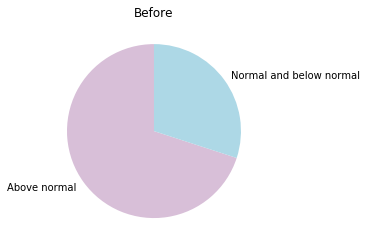

In [129]:
vals = [dataW[dataW['WHOk']==0]['WHOk'].count(), dataW[dataW['WHOk']!=0]['WHOk'].count()]
labels = ["Above normal", "Normal and below normal"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, startangle=90, colors=['thistle','lightblue'])
ax.set_title('Before')

Text(0.5, 1.0, 'After')

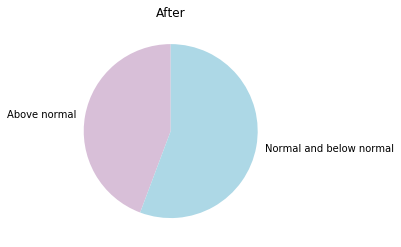

In [131]:
vals = [dataW[dataW['WHOkF']==0]['WHOkF'].count(), dataW[dataW['WHOkF']!=0]['WHOkF'].count()]
labels = ["Above normal", "Normal and below normal"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, startangle=90, colors=['thistle','lightblue'])
ax.set_title('After')